# 1. Libraries

In [28]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 2. Data Preparation

In [2]:
n = 100 #No. of samples
x = np.linspace(-np.pi, np.pi, n)  #np.linspace syntax needs start and end bounds of data and the number of samples
y = 0.5*x + np.sin(x) + np.random.random(x.shape)

## Visualization

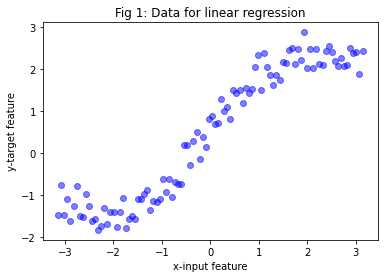

In [16]:
#Scatterplot of x-input feature and y-target feature
# Plot
plt.scatter(x, y, c="blue", alpha=0.5)
plt.title('Fig 1: Data for linear regression')
plt.xlabel('x-input feature')
plt.ylabel('y-target feature')
plt.show()

# 3. Data split into Training, Validation and testing datasets
Splitting into 70:15:15

In [12]:
# split into train, validation test sets
df = pd.DataFrame({'x': x, 'y': y}, columns=['x', 'y'])
df_train, df_validate, df_test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.85*len(df))])

In [13]:
df_train #70 rows of data

,x,y
17,-2.062662,-1.406924
78,1.808796,2.460627
56,0.412532,0.802194
61,0.729865,1.530307
99,3.141593,2.429317
...,...,...
43,-0.412532,-0.295317
24,-1.618396,-1.516350
63,0.856798,1.514268
32,-1.110664,-1.165237


In [14]:
df_validate #15 rows

,x,y
12,-2.379994,-1.577424
22,-1.745329,-1.799552
4,-2.887727,-1.615636
58,0.539465,1.427747
19,-1.935729,-1.781221
33,-1.047198,-1.100635
87,2.379994,2.417057
9,-2.570394,-0.994010
51,0.095200,0.684360
44,-0.349066,0.271617


In [15]:
df_test #15 rows

,x,y
47,-0.158666,0.384111
53,0.222133,1.267382
3,-2.951193,-1.102012
81,1.999195,2.018147
57,0.475999,1.491599
72,1.427997,1.737109
16,-2.126128,-1.693655
35,-0.920265,-0.936858
52,0.158666,0.698233
84,2.189595,2.471196


In [53]:
x_train = df_train[['x']]
y_train = df_train[['y']]
x_test = df_test[['x']]
y_test = df_test[['y']]
x_validate = df_validate[['x']]
y_validate = df_validate[['y']]

# 4. Fitting a line to the data

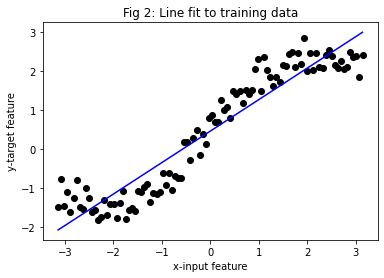

In [26]:

X = x.reshape(-1, 1) # Making sure x values are reshaped correctly
model = LinearRegression()  #Linear regression object creation
model.fit(X,y)              #Fit X and y 

plt.scatter(X, y,color='black')   # Scatterplot that we already saw in the begining
plt.plot(X, model.predict(X),color='b') # This will add the linear fit to our data
plt.title('Fig 2: Line fit to training data')
plt.xlabel('x-input feature')
plt.ylabel('y-target feature')
plt.show()

# 5. Performance metrics

In [37]:
def Performance_Metrics(x_train, y_train, x_test, y_test): 
    lr = LinearRegression()
    lr = lr.fit(x_train, y_train)
    lr_pred=lr.predict(x_test)     #predicting using the given test or validate dataset
    MSE = metrics.mean_squared_error(y_test,lr_pred)
    return MSE

In [55]:
print("Validation MSE",Performance_Metrics(x_train, y_train, x_validate, y_validate))

Validation MSE 0.31593839193411477


In [56]:
print("Test MSE",Performance_Metrics(x_train, y_train, x_test, y_test))

Test MSE 0.1678014124864074
